<a href="https://colab.research.google.com/github/Asifbbl/Froad-Detection/blob/main/Froad_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Fraud Detection



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting of drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Load Dataset
path =('/content/drive/MyDrive/data/Fraud.csv')
dataset=pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of (rows, columns) are',dataset.shape)

Number of (rows, columns) are (6362620, 15)


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

There is no duplicate value persent into the dataset

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no null value persent in the dataset

### What did you know about your dataset?

The given dataset does not have duplicate value or does not have null values persent.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Variables Description 

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values from every columns.
print('Check Number of unique value in each column')
print(dataset.nunique())
print('--'*50)


Check Number of unique value in each column
step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"The Unique Values of Variable ', {i}, 'are:", dataset[i].unique())
  print()
  print('--'*50)
  print()
     

The Unique Values of Variable ', step, 'are: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

dataset['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
# 
dataset['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# Value count
dataset['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

****************************************************************************************************
How many of them have  Previously Insurenced
0    6354407
1       8213
Name: isFraud, dtype: int64

****************************************************************************************************


<Axes: ylabel='isFraud'>

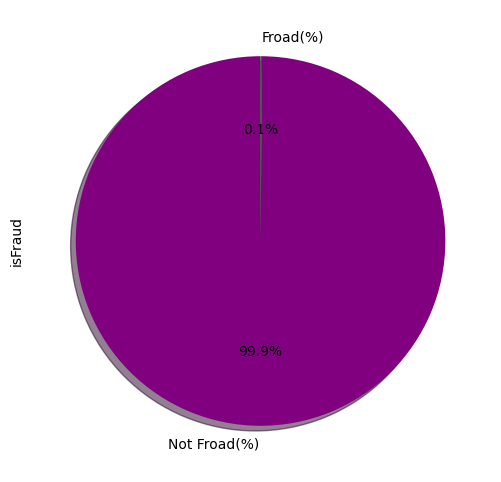

In [ ]:
# Chart - 1 visualization code

# Dependant Column Value Counts

print('*'*100)
print('How many of them have  Previously Insurenced')
print(dataset['isFraud'].value_counts())
print()


# Dependant Variable Column Visualization
print('*'*100)
dataset['isFraud'].value_counts().plot(kind='pie', figsize=(15,6), autopct="%1.1f%%", startangle=90, shadow=True,
                                       labels=['Not Froad(%)','Froad(%)'],colors=['purple','green'], explode=[0,0])

#### Chart - 2

<Axes: ylabel='isFraud'>

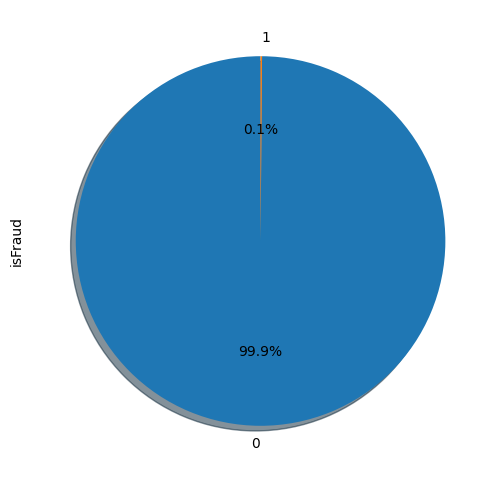

In [ ]:
# Chart - 2 visualization code

dataset['isFraud'].value_counts().plot(kind='pie', figsize=(15,6), autopct="%1.1f%%", startangle=90, shadow=True, explode=[0,0])

#### Chart - 3

<Axes: xlabel='type', ylabel='count'>

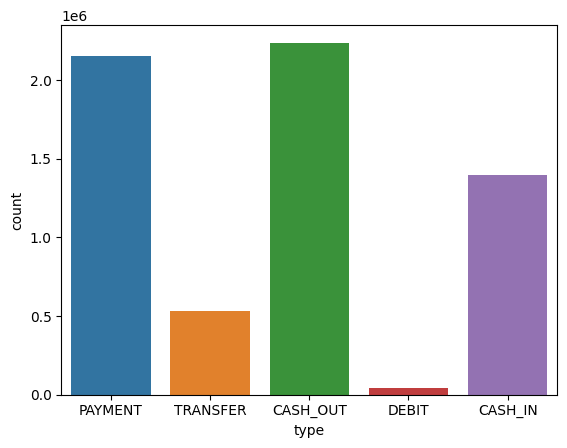

In [ ]:
# Chart - 3 visualization code

sns.countplot(x=dataset['type'])

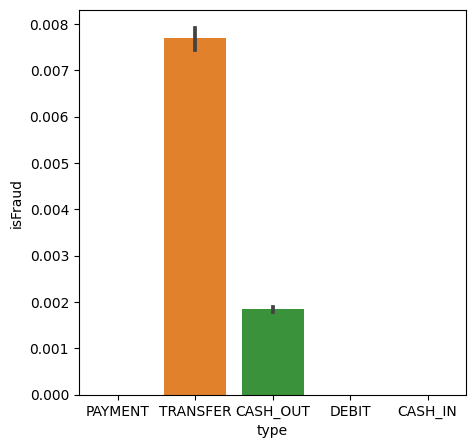

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(5,5))
sns.barplot(x='type', y='isFraud', data=dataset)
plt.show()

#### Chart - 4

In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Chart - 14 - Correlation Heatmap 


<ipython-input-32-54c689c8bbdf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)


<Axes: >

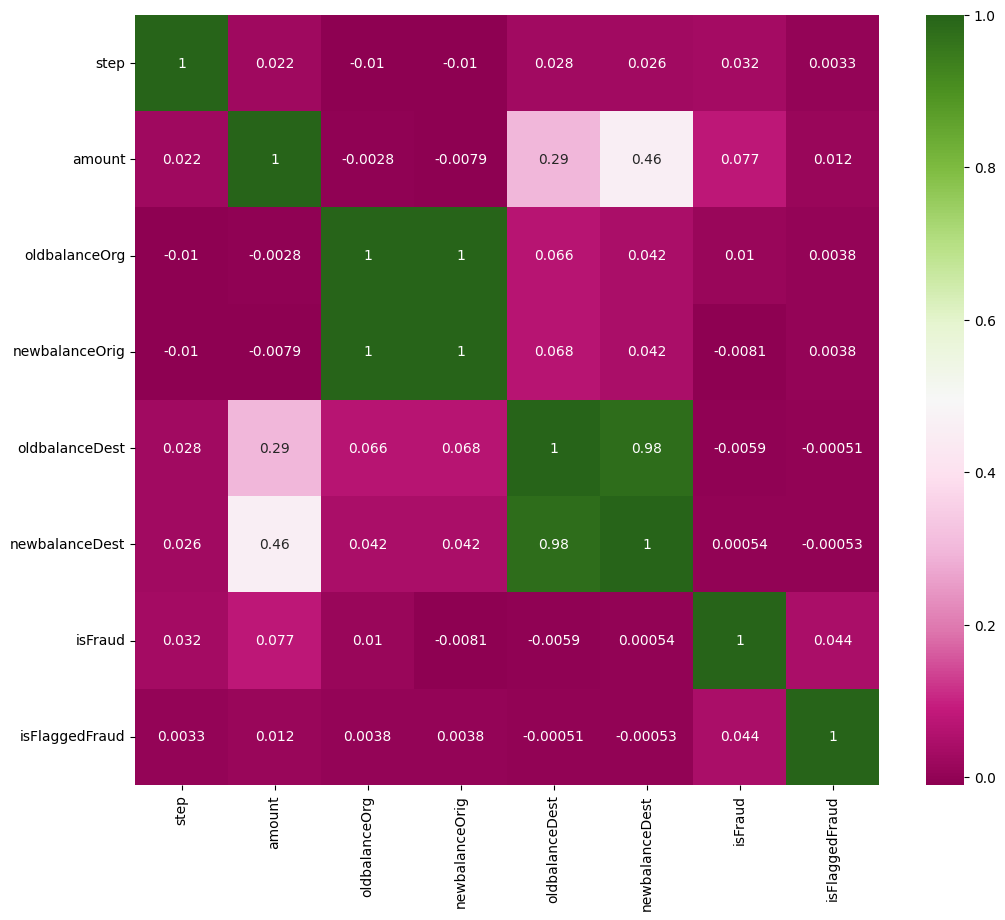

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# There is no missing values persent in the dataset 

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# defining the code for outlier detection and percentage using IQR.
def find_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [ ]:
# Continuous variable 
continuous_variable = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continuous_variable:
  print('--'*50)
  print(f'** Percentage of outliers of continuous variable of columns {feature} **')
  print(feature,":")
  find_outliers(dataset[feature])
  print("\n")

----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns amount**
amount :
q1:13389.57, q2:74871.94, q3:208721.4775
Lower bound: -279608.29125, Upper bound: 501719.33875, IQR: 195331.9075
Total number of outliers are: 338078
Total percentage of outlier is: 5.31 %


----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns oldbalanceOrg**
oldbalanceOrg :
q1:0.0, q2:14208.0, q3:107315.175
Lower bound: -160972.7625, Upper bound: 268287.9375, IQR: 107315.175
Total number of outliers are: 1112507
Total percentage of outlier is: 17.49 %


----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns newbalanceOrig**
newbalanceOrig :
q1:0.0, q2:0.0, q3:144258.41
Lower bound: -216387.615, Uppe

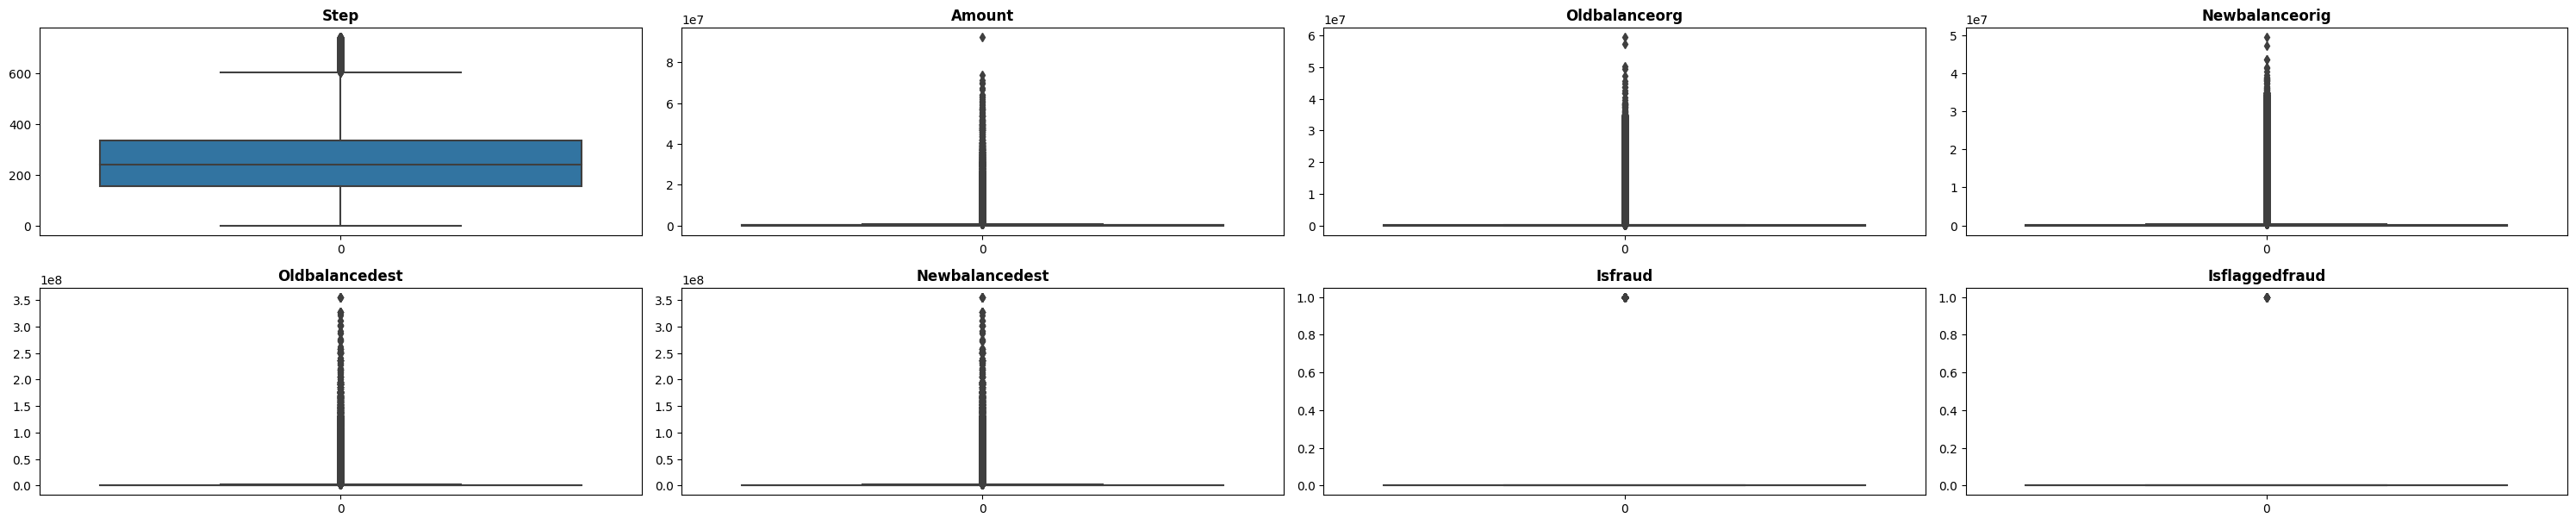

In [ ]:
# code to find outliers
def showoutliers(data):
  plt.figure(figsize=(30,15))
  for n,column in enumerate(data.describe().columns):
    plt.subplot(5, 4, n+1)
    sns.boxplot(data[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
  

showoutliers(dataset)

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continuous_variable:
  dataset[feature]= treat_outliers_iqr(dataset[feature])

  
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature a
for feature in continuous_variable:
  print('--'*50)
  print(f'** After treating outlierrs the percentage of outliers are : {feature} **')
  print(feature,":")
  find_outliers(dataset[feature])
  print("\n")

----------------------------------------------------------------------------------------------------
** After treating outlierrs the percentage of outliers are : **
amount :
q1:13389.0, q2:74871.5, q3:208721.0
Lower bound: -279609.0, Upper bound: 501719.0, IQR: 195332.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------------------------------------------------------------------------------------
** After treating outlierrs the percentage of outliers are : **
oldbalanceOrg :
q1:0.0, q2:14208.0, q3:107315.0
Lower bound: -160972.5, Upper bound: 268287.5, IQR: 107315.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------------------------------------------------------------------------------------
** After treating outlierrs the percentage of outliers are : **
newbalanceOrig :
q1:0.0, q2:0.0, q3:144258.0
Lower bound: -216387.0, Upper bound: 360645.0, IQR: 144258.0
Total number of outliers are: 0
Total pe

We have uesd interqurtile range to treat outliers

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Encode your categorical columns of Season 
dataset['PAYMENT'] = np.where(dataset['type']=='PAYMENT',1,0)
dataset['TRANSFER'] = np.where(dataset['type']=='TRANSFER',1,0)
dataset['CASH_OUT'] = np.where(dataset['type']=='CASH_OUT',1,0)
dataset['DEBIT'] = np.where(dataset['type']=='DEBIT',1,0)
dataset['CASH_IN'] = np.where(dataset['type']=='CASH_IN',1,0)


# Drop the original column Season from the dataframe
dataset.drop(columns=['type'], axis=1, inplace=True)

In [ ]:
dataset.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
0,1,9839,C1231006815,170136,160296,M1979787155,0.0,0.0,0,0,1,0,0,0,0
1,1,1864,C1666544295,21249,19384,M2044282225,0.0,0.0,0,0,1,0,0,0,0
2,1,181,C1305486145,181,0,C553264065,0.0,0.0,1,0,0,1,0,0,0
3,1,181,C840083671,181,0,C38997010,21182.0,0.0,1,0,0,0,1,0,0
4,1,11668,C2048537720,41554,29885,M1230701703,0.0,0.0,0,0,1,0,0,0,0


In [ ]:
# categorical Variable
categorical_variable = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN', 'isFraud', 'isFlaggedFraud']

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in categorical_variable:
  print('--'*50)
  print(f'** Percentage of outliers of continuous variable of columns {feature} **')
  print(feature,":")
  find_outliers(dataset[feature])
  print("\n")

----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns PAYMENT **
PAYMENT :
q1:0.0, q2:0.0, q3:1.0
Lower bound: -1.5, Upper bound: 2.5, IQR: 1.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns TRANSFER **
TRANSFER :
q1:0.0, q2:0.0, q3:0.0
Lower bound: 0.0, Upper bound: 0.0, IQR: 0.0
Total number of outliers are: 532909
Total percentage of outlier is: 8.38 %


----------------------------------------------------------------------------------------------------
** Percentage of outliers of continuous variable of columns CASH_OUT **
CASH_OUT :
q1:0.0, q2:0.0, q3:1.0
Lower bound: -1.5, Upper bound: 2.5, IQR: 1.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


----------------------

We have applied onehot coding to the type of payment variable.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<ipython-input-25-bfbd377a15a6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)


<Axes: >

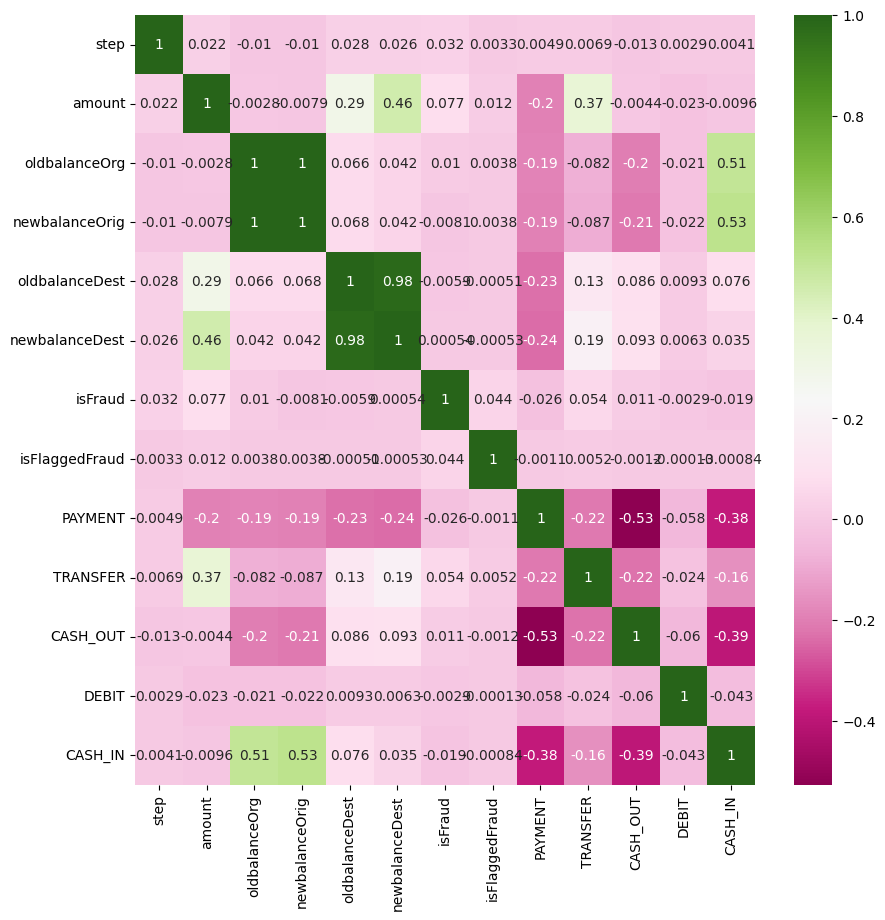

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap ='PiYG', annot = True)

#### 2. Feature Selection

In [ ]:
# Import VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Code to calculate VIF 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns ]])

,variables,VIF
0,step,1.003449
1,amount,4.075424
2,oldbalanceOrg,669.074960
3,newbalanceOrig,688.656352
4,oldbalanceDest,68.603157
5,newbalanceDest,79.000140
6,isFraud,1.226090
7,isFlaggedFraud,1.002819
8,PAYMENT,2.000996
9,TRANSFER,1.479245


In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['oldbalanceOrg']]])

,variables,VIF
0,step,1.003448
1,amount,4.074621
2,newbalanceOrig,1.388088
3,oldbalanceDest,68.461461
4,newbalanceDest,78.876015
5,isFraud,1.017149
6,isFlaggedFraud,1.002379
7,PAYMENT,1.999910
8,TRANSFER,1.475916
9,CASH_OUT,2.078095


In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['oldbalanceOrg', 'oldbalanceDest']]])

,variables,VIF
0,step,1.002298
1,amount,1.422874
2,newbalanceOrig,1.387405
3,newbalanceDest,1.310212
4,isFraud,1.011744
5,isFlaggedFraud,1.002088
6,PAYMENT,1.999723
7,TRANSFER,1.474899
8,CASH_OUT,2.078084
9,DEBIT,1.021081


In [ ]:
final_df = dataset[[i for i in dataset.describe().columns if i not in ['oldbalanceOrg','oldbalanceDest']]]

In [ ]:
final_df.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
0,1,9839,160296,0.0,0,0,1,0,0,0,0
1,1,1864,19384,0.0,0,0,1,0,0,0,0
2,1,181,0,0.0,1,0,0,1,0,0,0
3,1,181,0,0.0,1,0,0,0,1,0,0
4,1,11668,29885,0.0,0,0,1,0,0,0,0


<Axes: >

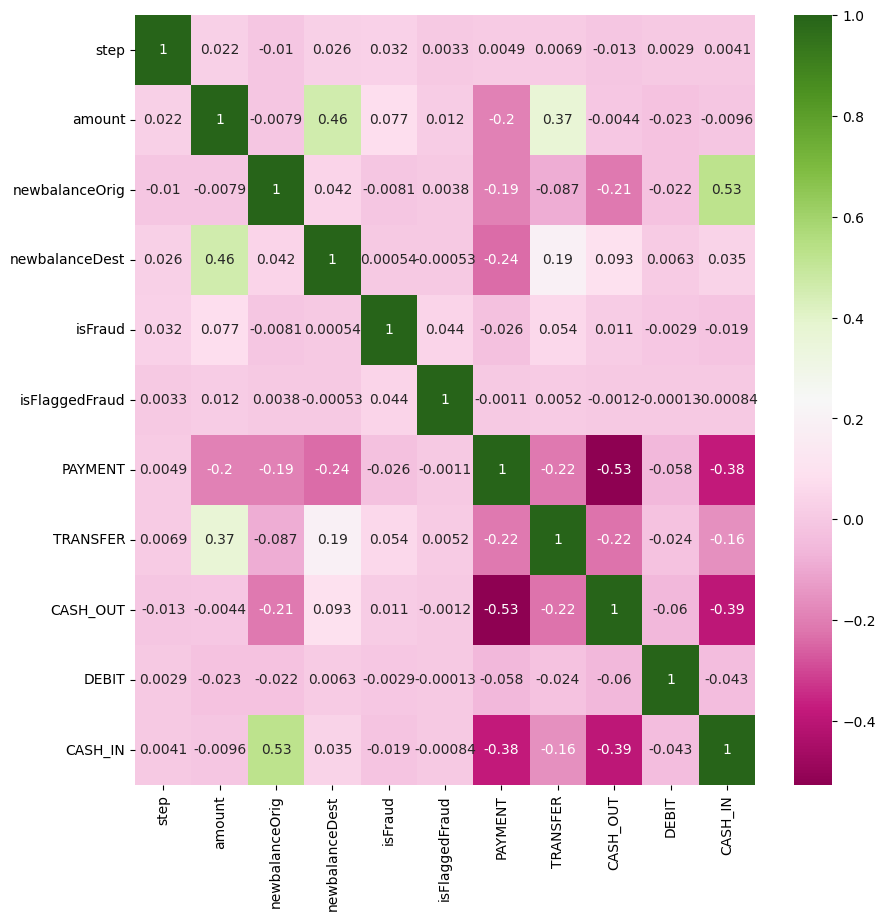

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

plt.figure(figsize=(10,10))
sns.heatmap(final_df.corr(), cmap ='PiYG', annot = True)

### 8. Data Splitting

In [ ]:
dataset.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,PAYMENT,TRANSFER,CASH_OUT,DEBIT,CASH_IN
0,1,9839,C1231006815,170136,160296,M1979787155,0.0,0.0,0,0,1,0,0,0,0
1,1,1864,C1666544295,21249,19384,M2044282225,0.0,0.0,0,0,1,0,0,0,0
2,1,181,C1305486145,181,0,C553264065,0.0,0.0,1,0,0,1,0,0,0
3,1,181,C840083671,181,0,C38997010,21182.0,0.0,1,0,0,0,1,0,0
4,1,11668,C2048537720,41554,29885,M1230701703,0.0,0.0,0,0,1,0,0,0,0


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = final_df.drop(columns=['isFraud'],axis =1)
y= final_df['isFraud']

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Checking the distribution of in training dataset  
print("Distribution of data for dependent variable in train :")
print(y_train.value_counts())

print('-'*50)

# Checking the distribution of in test dataset  
print("Distribution of data for dependent variable in test :")
print(y_test.value_counts())

Distribution of data for dependent variable in train :
0    5083526
1       6570
Name: isFraud, dtype: int64
--------------------------------------------------
Distribution of data for dependent variable in test :
0    1270881
1       1643
Name: isFraud, dtype: int64


### 9. Handling Imbalanced Dataset

In [ ]:
# Handling Imbalanced Dataset
print('Check the given data is balanced or not') 

print('--'*50)
dataset['isFraud'].value_counts()

Check the given data is balanced or not
----------------------------------------------------------------------------------------------------


0    6354407
1       8213
Name: isFraud, dtype: int64

the given data in not balance.

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    6354407
1       8213
Name: isFraud, dtype: int64 

After Handling Class Imbalace:
0    6354407
1    6354407
Name: isFraud, dtype: int64 



We have applied SMOTE  to handle imbalance data Now we can say that the given data is balanced then apply machine learning algorithm

### 10. Data  Resplitting

In [ ]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0) 

In [ ]:
# Check the distribution of in train dataset  dependent Variable
print("Distribution of data for dependent variable in test :")
print(y_smote_train.value_counts())

print('-'*50)

# Check the distribution of in test dataset  dependent Variable
print("Distribution of data for dependent variable in test :")
print(y_smote_train.value_counts())

Distribution of data for dependent variable in test :
0    5084802
1    5082249
Name: isFraud, dtype: int64
--------------------------------------------------
Distribution of data for dependent variable in test :
0    5084802
1    5082249
Name: isFraud, dtype: int64


## ***6. Data Scaling***


In [ ]:

## Rescaling your data
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x_smote_train= std_scaler.fit_transform(x_smote_train)
x_smote_test= std_scaler.transform(x_smote_test)
     

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

### **ML Model 1- Logistic Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

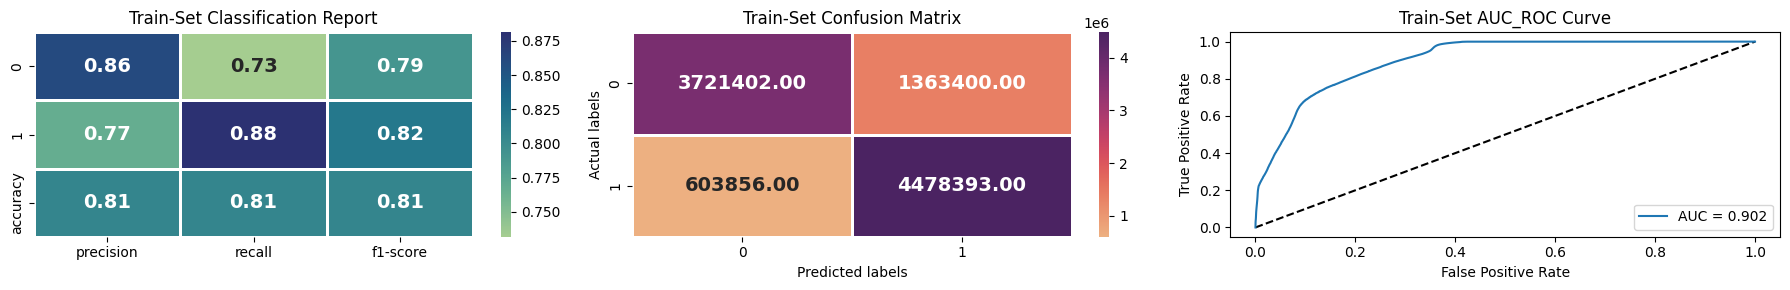

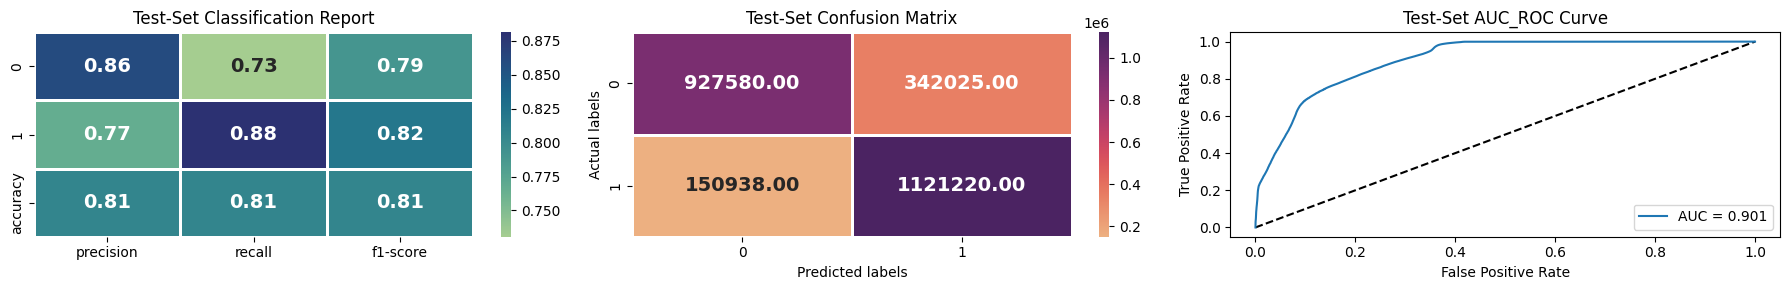

LogisticRegression(max_iter=20000, random_state=0)

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)

# Predict on the model
analyse_model(logistic_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

### **ML Model 2- Decission Tree Classifier**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

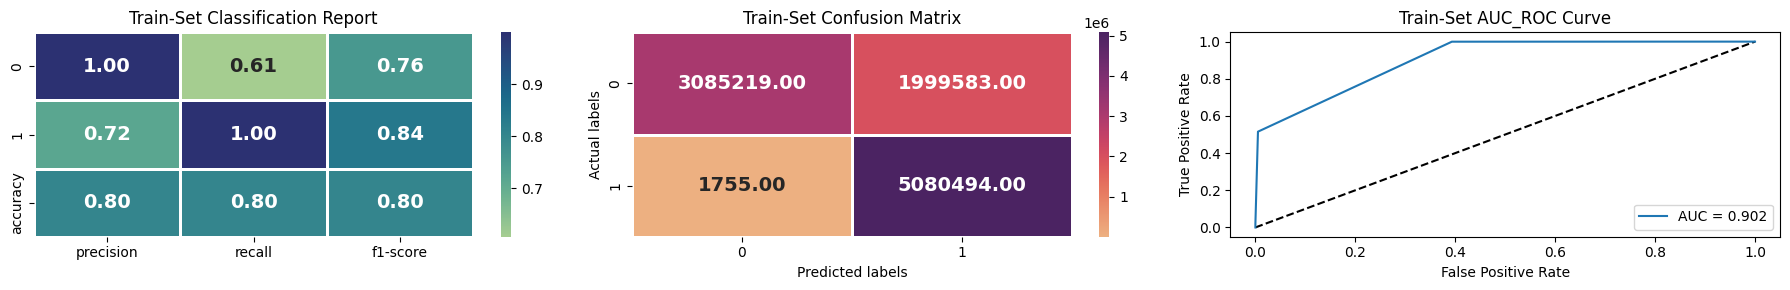

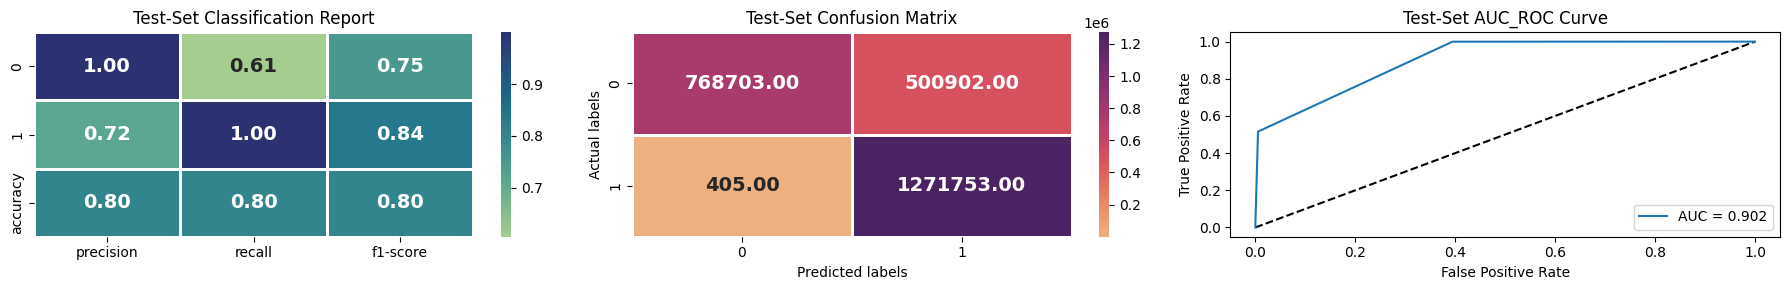

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
# Import Decission Tree algorithms
from sklearn.tree import DecisionTreeClassifier


# Fitting Decission tree algorthms
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

# Analyse the model 
analyse_model(clf_gini,x_smote_train,x_smote_test, y_smote_train, y_smote_test)

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

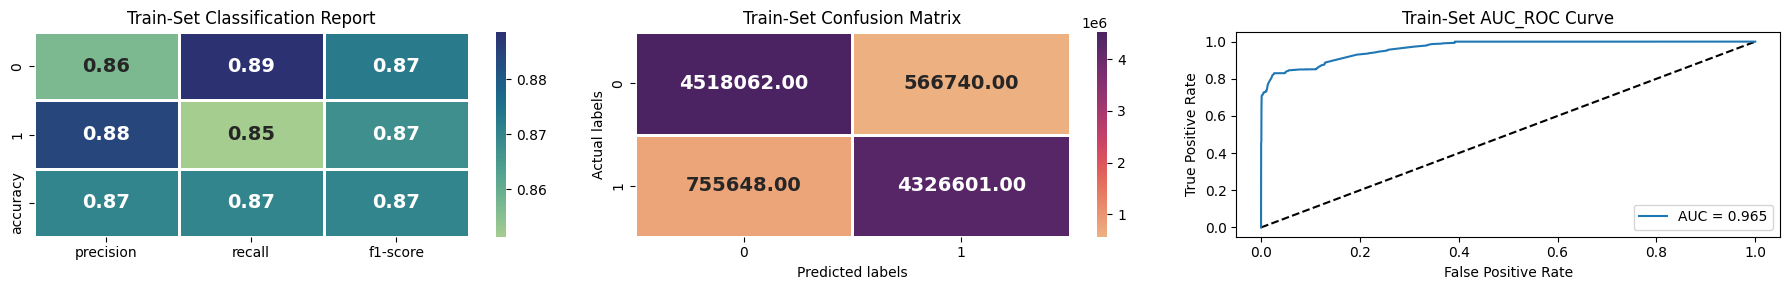

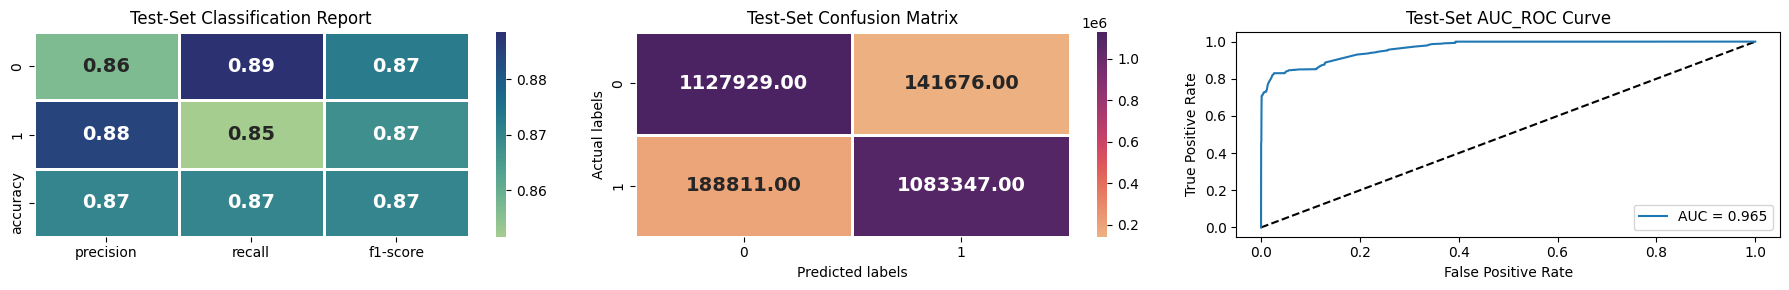

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

### **ML Model - Naive Bayes Classifier**

In [ ]:
# Import Library
from sklearn.naive_bayes import GaussianNB

# Fitting model 
NB_classifier =GaussianNB()

# Analyse the model
analyse_model(NB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

### **ML Model - XGBoost**

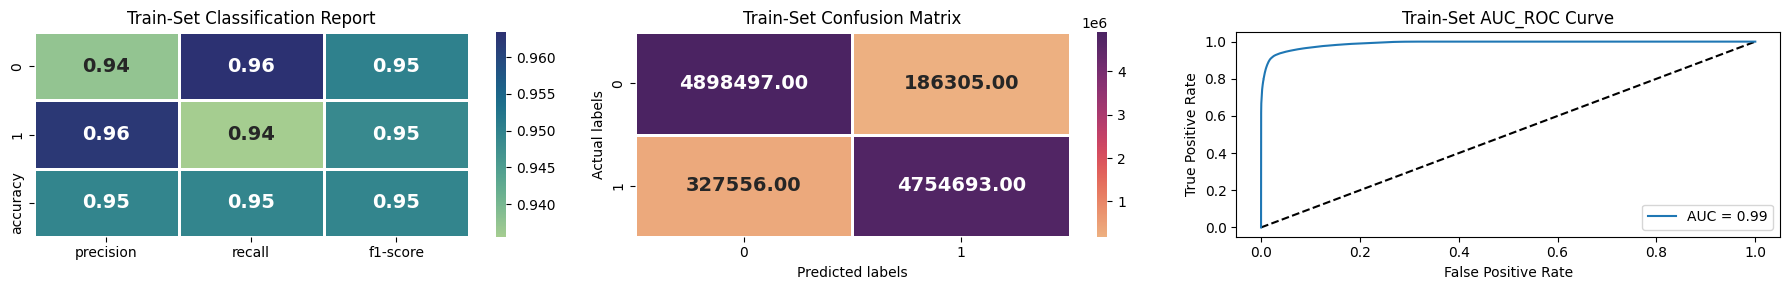

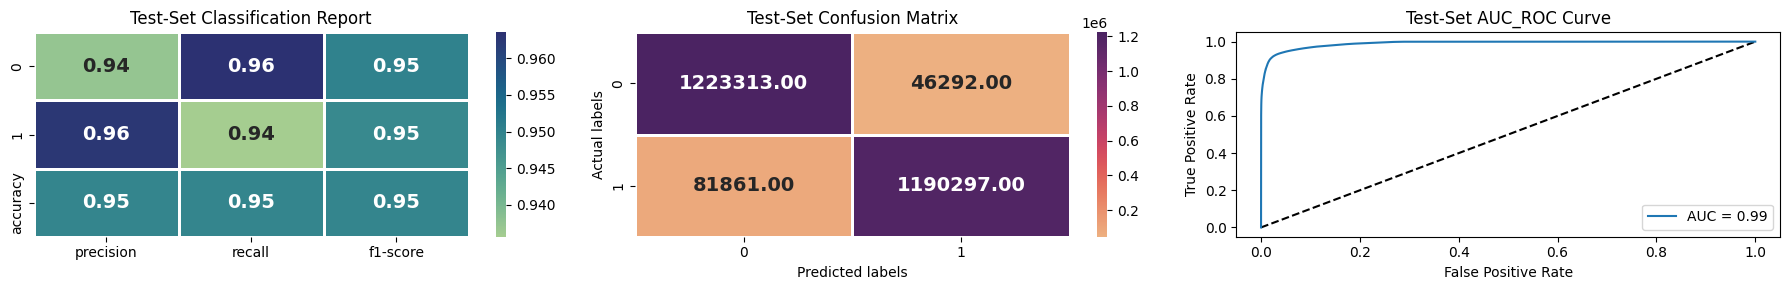

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier(random_state=0)

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(XGB_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***